<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear II</h1>

# <font color='red' style='font-size: 30px;'>1.2 Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando a biblioteca pandas

https://pandas.pydata.org/

In [1]:
import pandas as pd

## O Dataset e o Projeto
<hr>

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>O mercado imobiliário vem sendo objeto de diversos estudos e pesquisas nos últimos tempos. A crise financeira que afeta a economia tem afetado significativamente os investimentos e ganhos advindos deste setor. Este cenário incentiva o aumento do interesse por estudos de previsão de demanda baseados em características deste mercado, dos imóveis e do entorno destes imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Neste contexto o objetivo principal do nosso projeto é desenvolver um sistema de avaliação imobiliária utilizando a metodologia de regressões lineares que é uma das técnicas de machine learning.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Nosso *dataset* é uma amostra aleatória de tamanho 5000 de imóveis disponíveis para venda no município do Rio de Janeiro.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Valor</b> - Valor (R$) de oferta do imóvel</li>
    <li><b>Area</b> - Área do imóvel em m²</li>
    <li><b>Dist_Praia</b> - Distância do imóvel até a praia (km) (em linha reta)</li>
    <li><b>Dist_Farmacia</b> - Distância do imóvel até a farmácia mais próxima (km) (em linha reta)</li>
</ul>

## Leitura dos dados

In [3]:
dados = pd.read_csv('dataset.csv', sep=';')

## Visualizar os dados

In [4]:
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


## Verificando o tamanho do dataset

In [5]:
dados.shape

(5000, 4)

# <font color='red' style='font-size: 30px;'>1.3 Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [7]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
Valor,5000.0,1.402926e+06,1.883269e+06,75000.000000,460000.000000,820000.000000,1.590000e+06,2.500000e+07
Area,5000.0,1.219448e+02,9.053697e+01,16.000000,70.000000,93.000000,1.460000e+02,2.000000e+03
Dist_Praia,5000.0,3.021920e+00,3.170933e+00,0.000000,0.438417,1.476958,5.605379e+00,1.796294e+01
Dist_Farmacia,5000.0,4.971598e-01,2.913553e-01,0.000331,0.238640,0.503260,7.477367e-01,9.999870e-01


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

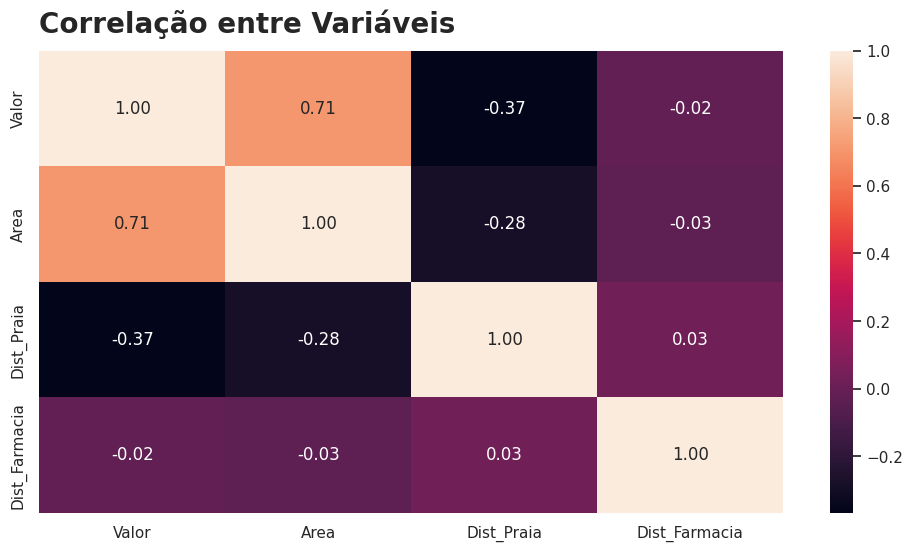

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

plt.figure(figsize = (12,6))
imagem = sns.heatmap(dados.corr(), annot= True, fmt= '.2f')
imagem.set_title('Correlação entre Variáveis', fontsize = 20, weight = 'bold', loc = 'left', y =1.02);

In [39]:
# Verificando correlação dos Preditores com entre si
dados.corr().drop('Valor').abs()

,Valor,Area,Dist_Praia,Dist_Farmacia
Area,0.710974,1.000000,0.283371,0.030990
Dist_Praia,0.366542,0.283371,1.000000,0.025645
Dist_Farmacia,0.024366,0.030990,0.025645,1.000000


# <font color='red' style='font-size: 30px;'>2.1 Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

## Importando biblioteca seaborn
https://seaborn.pydata.org/
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O Seaborn é uma biblioteca Python de visualização de dados baseada no matplotlib. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos.</p>

In [40]:
dados.columns

Index(['Valor', 'Area', 'Dist_Praia', 'Dist_Farmacia'], dtype='object')

<AxesSubplot: title={'left': 'Comportamento Preço'}, ylabel='Valor'>

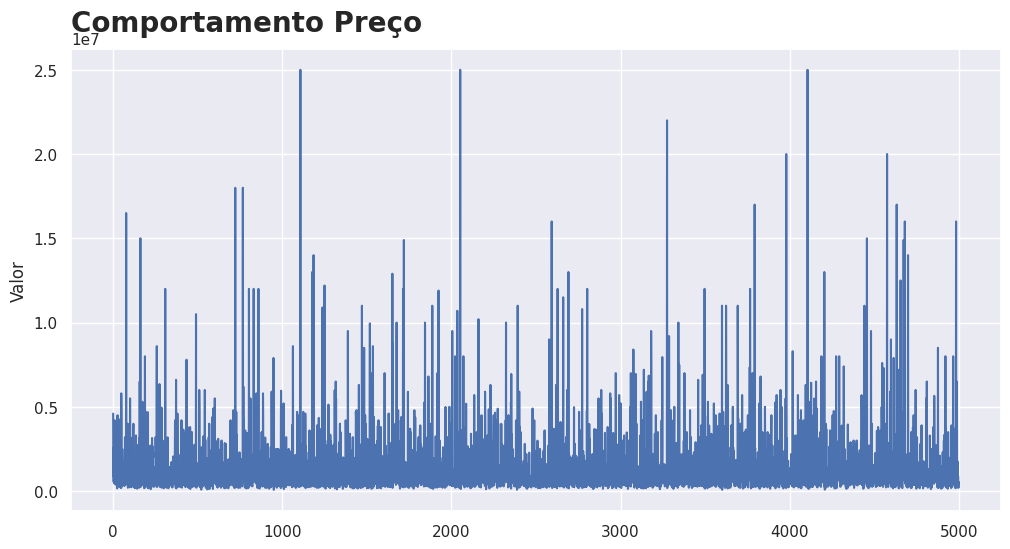

In [26]:
plt.figure(figsize = (12,6))
imagem = sns.lineplot(dados['Valor'])
imagem.set_title('Comportamento Preço', fontsize = 20, weight = 'bold', loc = 'left', y =1.02)
imagem


## Configurações de formatação dos gráficos

In [ ]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

# style -> white, dark, whitegrid, darkgrid, ticks


## Box plot da variável *dependente* (y)

<img width='700px' src='../Dados/img/Box-Plot.png'>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

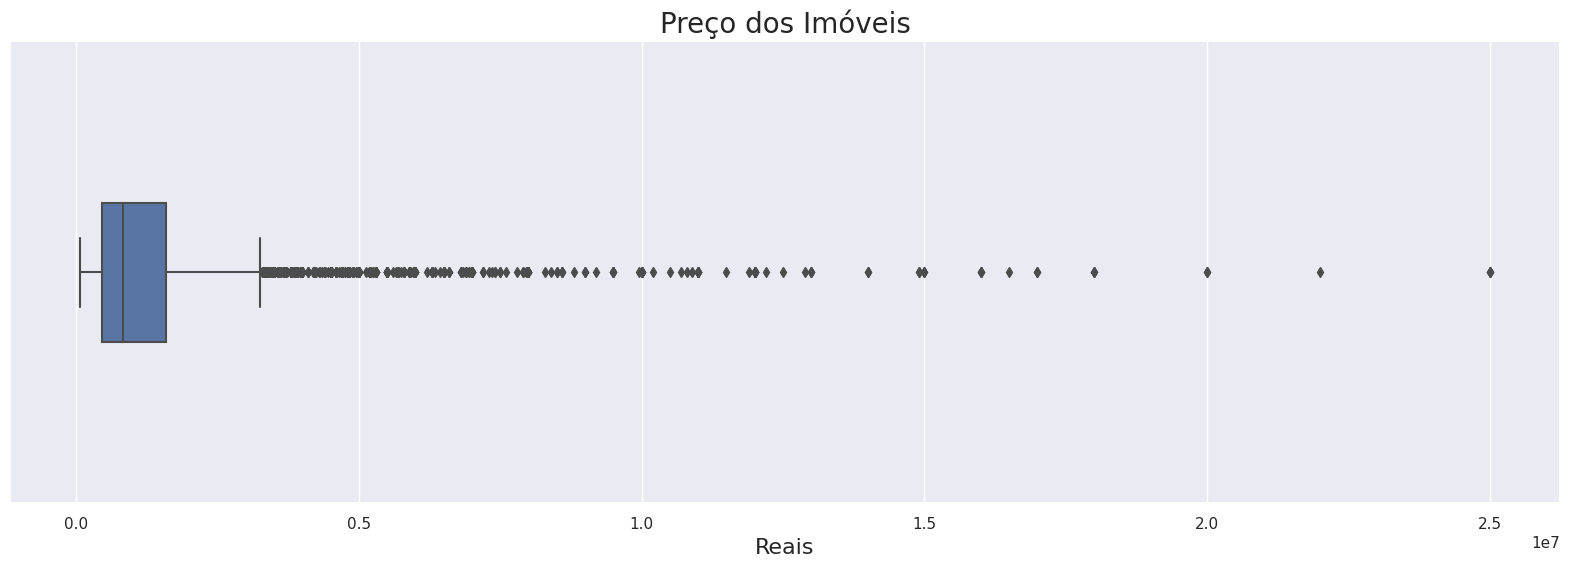

In [38]:
ax = sns.boxplot(data = dados, x = 'Valor', orient= 'h', width= 0.3)
ax.figure.set_size_inches(20, 6)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_xlabel('Reais', fontsize=16)
ax;

# <font color='red' style='font-size: 30px;'>2.2 Distribuição de Frequências</font>
<hr style='border: 2px solid red;'>

## Distribuição de frequências da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

<AxesSubplot: title={'center': 'Distribuição de Frequências'}, xlabel='Preço dos Imóveis (R$)', ylabel='Count'>

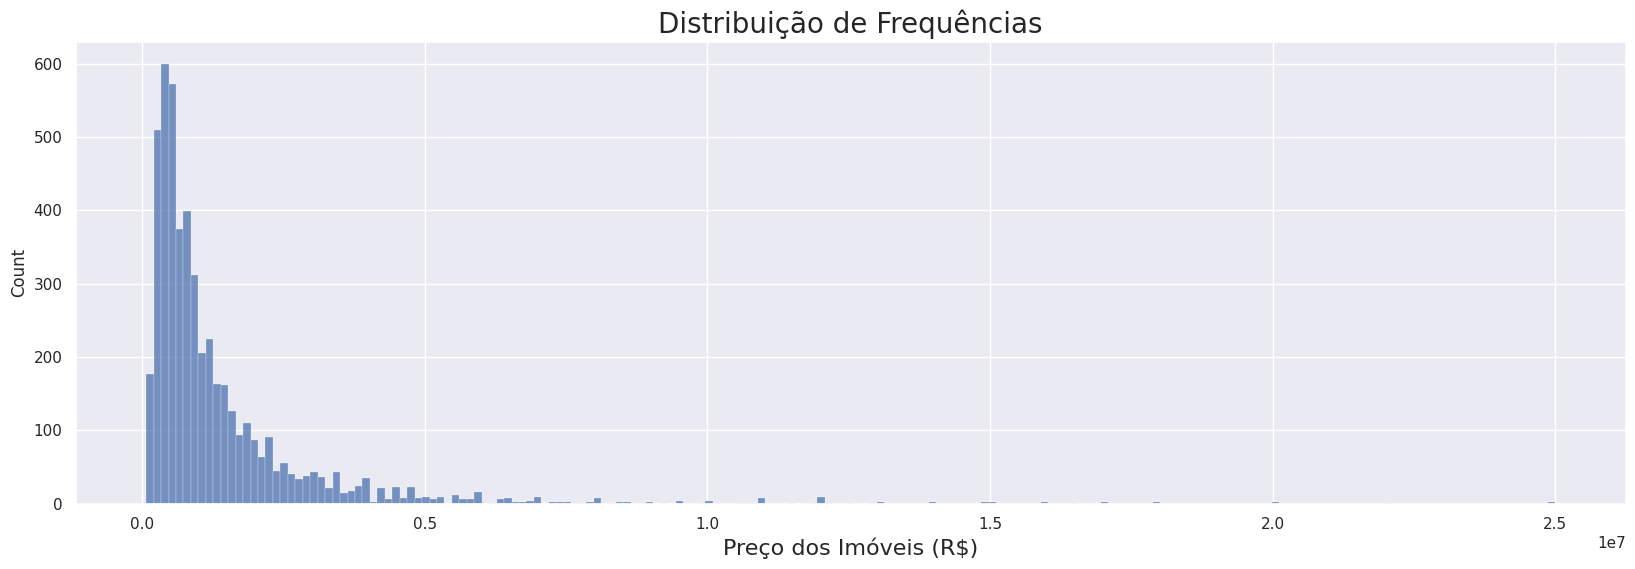

In [42]:
ax = sns.histplot(dados['Valor'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Preço dos Imóveis (R$)', fontsize=16);
ax

<img width='800px' src='../Dados/img/Box-Plot II.png'>

# <font color='red' style='font-size: 30px;'>2.3 Dispersão Entre as Variáveis</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis do dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre pares de variáveis em um dataset.</p>

In [45]:
dados.columns

Index(['Valor', 'Area', 'Dist_Praia', 'Dist_Farmacia'], dtype='object')

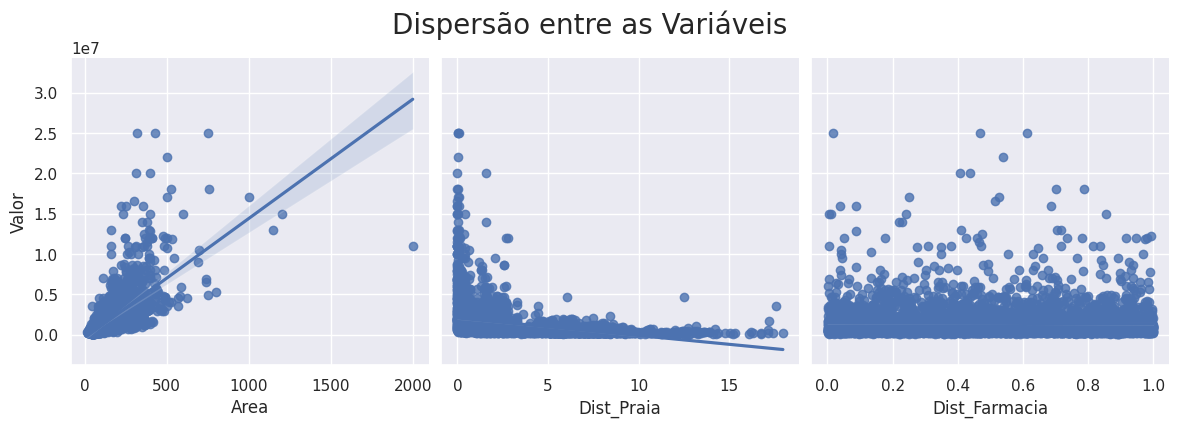

In [50]:
ax = sns.pairplot(dados, y_vars= 'Valor', x_vars= ['Area', 'Dist_Praia', 'Dist_Farmacia' ], kind= 'reg', height= 4)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax;

In [ ]:

ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

# <font color='red' style='font-size: 30px;'>3.1 Transformando os Dados</font>
<hr style='border: 2px solid red;'>

## Distribuição Normal
<hr>

### Por quê? 
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Testes paramétricos assumem que os dados amostrais foram coletados de uma população com distribuição de probabilidade conhecida. Boa parte dos testes estatísticos assumem que os dados seguem uma distribuição normal (t de Student, intervalos de confiança etc.).</p>



<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>

## Importando biblioteca numpy

In [51]:
import numpy as np

## Aplicando a transformação logarítmica aos dados do *dataset*

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.log.html

Como podemos ver os dados não estavam nem perto de uma distribuição normal

Para tentar minimizar este problema e fazer com que o modelo tenha uma melhor performance, vamos aplicar o Log a todas as variáveis

O único Detalha é que temos que ficar espertos com valores igual a 0. Quando estiverem presentes, devemos somar +1 a variável 

In [53]:

dados2 = pd.DataFrame()
dados2['Valor'] = np.log(dados['Valor'])
dados2['Area'] = np.log(dados['Area'])
dados2['Dist_Praia'] = np.log(dados['Dist_Praia'] + 1)
dados2['Dist_Farmacia'] = np.log(dados['Dist_Farmacia'] + 1)

## Distribuição de frequências da variável *dependente transformada* (y)

In [ ]:

ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('log do Preço dos Imóveis', fontsize=16)
ax

# <font color='red' style='font-size: 30px;'>3.2 Verificando Relação Linear</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis transformadas do dataset

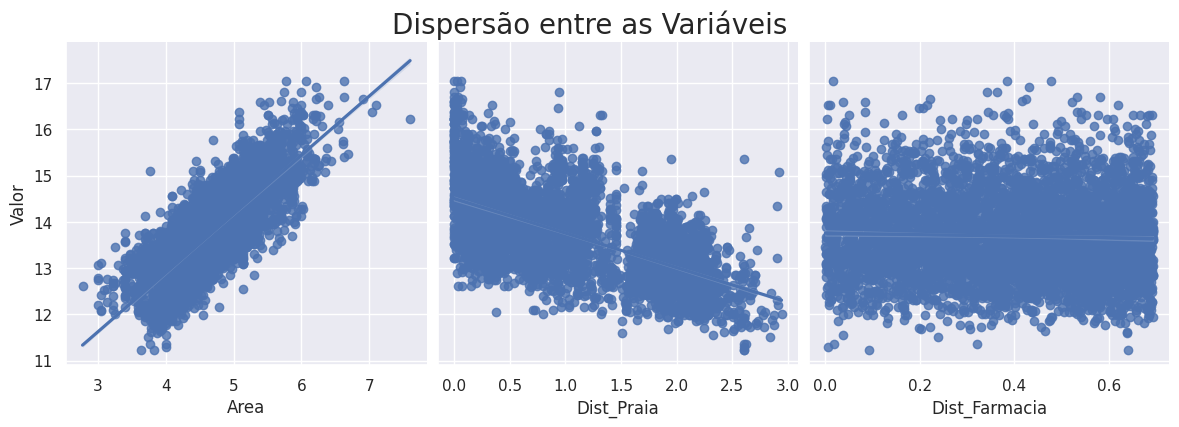

In [55]:
ax = sns.pairplot(dados2, y_vars= 'Valor', x_vars= ['Area', 'Dist_Praia', 'Dist_Farmacia' ], kind= 'reg', height= 4)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax;

# <font color='red' style='font-size: 30px;'>4.1 Criando os *Datasets* de Treino e Teste</font>
<hr style='border: 2px solid red;'>

## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [56]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar o Preço dos Imóveis (y)

In [57]:
y = dados2['Valor']

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [58]:
x = dados.drop(['Valor'], axis= 1)

## Criando os datasets de treino e de teste

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.30)

# Regresão Linear
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável <b>dependente</b>) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O *scikit-learn* é um módulo Python especializado em soluções para *machine learning*.</p>



<img width='800px' src='../Dados/img/Log-linear.png'>

## Importando a biblioteca statsmodels

https://www.statsmodels.org/stable/index.html

In [59]:
import statsmodels.api as sm

## Estimando o modelo com statsmodels

In [64]:
# Verique que o Statis Models cria uma constanta
x_train_com_constante = sm.add_constant(x_train)
x_train_com_constante.head()

,const,Area,Dist_Praia,Dist_Farmacia
2665,1.0,56,3.648284,0.057569
2487,1.0,70,0.826529,0.242995
1464,1.0,110,2.509936,0.338211
1489,1.0,180,0.284002,0.466091
4046,1.0,60,5.111364,0.071226


In [65]:
#Treinando o Modelo
modelo_statsmodels = sm.OLS(y_train, x_train_com_constante, hasconst= True).fit()

# <font color='red' style='font-size: 30px;'>4.2 Avaliando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Avaliando as estatísticas de teste do modelo

In [67]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:                  Valor   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     2561.
Date:                Sun, 27 Nov 2022   Prob (F-statistic):               0.00
Time:                        15:16:22   Log-Likelihood:                -2609.5
No. Observations:                3500   AIC:                             5227.
Df Residuals:                    3496   BIC:                             5252.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            13.4095      0.023    571.290

# <font color='red' style='font-size: 30px;'>4.3 Modificando o Modelo e Avaliando Novamente o Ajuste</font>
<hr style='border: 2px solid red;'>

## Criando um novo conjunto de variáveis explicativas (X)

In [69]:
x = dados2[['Area', 'Dist_Praia']]

## Criando os datasets de treino e de teste

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .30, random_state= 2811)

## Estimando o modelo com o statsmodels

In [71]:
x_train_com_constante = sm.add_constant(x_train)

In [72]:
modelo_statsmodels = sm.OLS(y_train, x_train_com_constante, hasconst= True).fit()

## Avaliando as estatísticas de teste do novo modelo

In [74]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:                  Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     7237.
Date:                Sun, 27 Nov 2022   Prob (F-statistic):               0.00
Time:                        15:27:24   Log-Likelihood:                -1780.2
No. Observations:                3500   AIC:                             3566.
Df Residuals:                    3497   BIC:                             3585.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3211      0.063    147.917      0.0

# <font color='red' style='font-size: 30px;'>5.1 Estimando o Modelo com os Dados de Treino</font>
<hr style='border: 2px solid red;'>

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [76]:
modelo = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [77]:
modelo.fit(x_train, y_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [84]:
print(f'R² = {round(modelo.score(x_train, y_train),2)}')

R² = 0.81


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [85]:
previsoes = modelo.predict(x_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [90]:
print(f'R2 = {round(metrics.r2_score(y_test, previsoes),2)}')

R2 = 0.79


# <font color='red' style='font-size: 30px;'>5.2 Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [92]:
entrada = x_test[9:10]
entrada

,Area,Dist_Praia
402,4.174387,0.547854


## Gerando previsão pontual

In [94]:
modelo.predict(entrada)[0]

13.480602075927925

## Invertendo a transformação para obter a estimativa em R$

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.exp.html

In [96]:
# Convertendo o valor para a escala real
np.exp(modelo.predict(entrada))[0]

715403.5556333065

In [98]:
# Veriricando o valor real do imovel
dados[dados.index == 402]

,Valor,Area,Dist_Praia,Dist_Farmacia
402,690000,65,0.729537,0.957772


## Criando um simulador simples

In [110]:
# Estou adicionando 1 a Distancia da Praia porque posso ter valores negativos na distancia da praia
Area = 350
Dist_Praia = 1
entrada = [[np.log(Area), np.log(Dist_Praia + 1)]]

print(f'Valor do Imóvel R$ {np.exp(modelo.predict(entrada)[0]):.2f}')

Valor do Imóvel R$ 3973400.97


/home/evaldoj/anaconda3/envs/py10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# <font color='red' style='font-size: 30px;'>5.3 Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

## Obtendo o intercepto do modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b> representa o efeito médio em $Y$ (Preço do Imóveis) tendo todas as variáveis explicativas excluídas do modelo. No caso do modelo log-linear este coeficiente deve ser transformado com o uso da função exponencial para ser apresentado em R$.</p>

In [111]:
# Cuidado porque este valor está em LOG
modelo.intercept_

9.321082445534369

In [112]:
np.exp(modelo.intercept_)

11171.067383267717

## Obtendo os coeficientes de regressão

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os <b>coeficientes de regressão</b> $\beta_2$ e $\beta_3$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. </p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Um aspecto interessante do modelo log-linear, que o tornou muito utilizado nos trabalhos aplicados, é que os coeficientes angulares $\beta_2$ e $\beta_3$ medem as elasticidades de Y em relação a $X_2$ e $X_3$, isto é, a variação percentual de Y correspondente a uma dada variação percentual (pequena) em $X_2$ e $X_3$.</p>

In [113]:
modelo.coef_

array([ 1.06058843, -0.4887932 ])

## Confirmando a ordem das variáveis explicativas no DataFrame

In [114]:
x.columns

Index(['Area', 'Dist_Praia'], dtype='object')

## Criando uma lista com os nomes das variáveis do modelo

In [115]:
index = ['Intercepto', 'Área (m²)', 'Distancia até a Praia (Km']

## Criando um DataFrame para armazenar os coeficientes do modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [118]:
Dados_Modelo = pd.DataFrame(
    {
    'Dados': index,
    'Valores': np.append(modelo.intercept_, modelo.coef_)
    }
)

In [119]:
Dados_Modelo

,Dados,Valores
0,Intercepto,9.321082
1,Área (m²),1.060588
2,Distancia até a Praia (Km,-0.488793


## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=0$) o efeito médio no Preço dos Imóveis seria de <b>R$ 11.326,68</b> (exp[9.334916]).
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Área (m²)</b> → Mantendo-se o valor de $X_3$ (Distância até a Praia) constante, um acréscimo de 1% na Área de um imóvel gera, em média, um acréscimo de <b>1.06%</b> no Preço do Imóvel.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Distância até a Praia (km)</b> → Mantendo-se o valor de $X_2$ (Área) constante, um acréscimo de 1% na Distância de um imóvel até a praia gera, em média, um decréscimo de <b>0.49%</b> no Preço do Imóvel.
</p>

# <font color='red' style='font-size: 30px;'>5.4 Análises Gráficas dos Resultados do Modelo</font>
<hr style='border: 2px solid red;'>

## Gerando as previsões do modelo para os dados de TREINO

In [124]:
y_previsto_treino = modelo.predict(x_train)


## Gráfico de dispersão entre valor estimado e valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

<AxesSubplot: title={'center': 'Distribuição de Frequências dos Resíduos'}, xlabel='log do Preço', ylabel='Valor'>

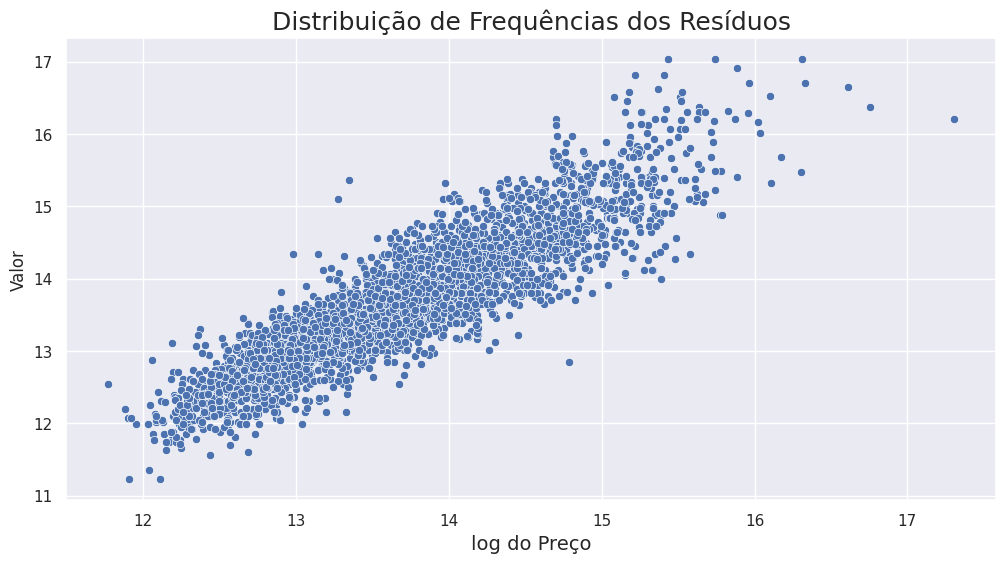

In [125]:

ax = sns.scatterplot(x= y_previsto_treino, y = y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('log do Preço', fontsize=14)
ax

## Obtendo os resíduos

In [126]:
residuo = y_train - y_previsto_treino

## Plotando a distribuição de frequências dos resíduos

<AxesSubplot: title={'center': 'Distribuição de Frequências dos Resíduos'}, xlabel='log do Preço', ylabel='Count'>

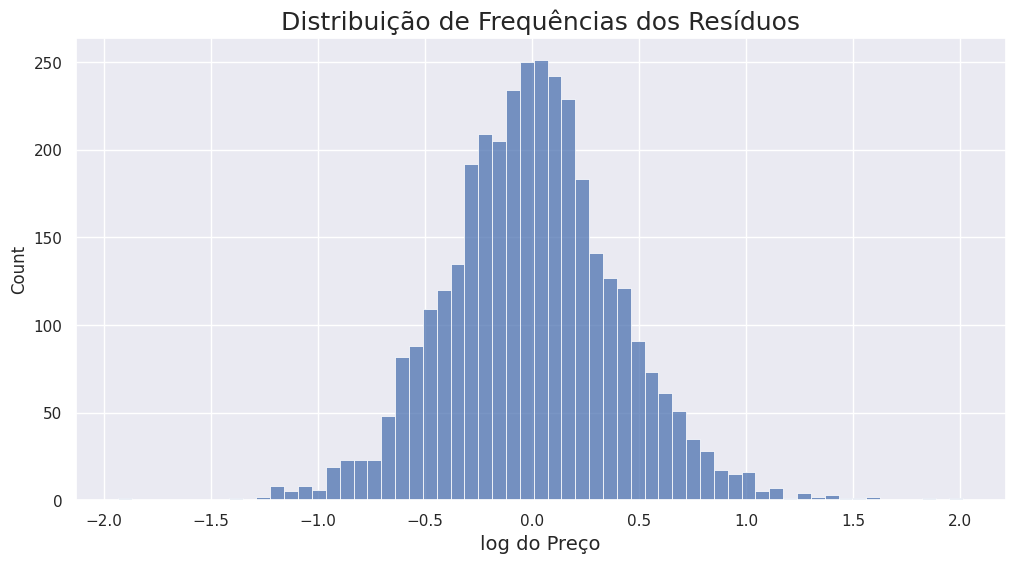

In [127]:
residuo = y_train - y_previsto_treino

ax = sns.histplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('log do Preço', fontsize=14)
ax
